In [1]:
import torch
import os
import tiktoken
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import json
import os
from tqdm import tqdm
import tiktoken
import h5py
import numpy as np

device = 'mps'

In [2]:
torch.__version__

'2.2.0.dev20231129'

In [3]:
enc = tiktoken.get_encoding('r50k_base')

In [3]:
# in_file = "/Volumes/External/EleutherAI_ThePile_v1/pile/test.jsonl"
# out_file = "data/pile_test.txt"
# os.makedirs('data', exist_ok=True)

# with open(out_file, 'w+') as out_f:
#     with open(in_file, 'r') as in_f:
#         for line in tqdm(in_f):
#             json_data = json.loads(line)
#             out_f.write(json_data['text'])

214584it [00:39, 5424.06it/s]


In [ ]:
# out_file = "data/pile.txt"

# with open(out_file, 'r') as data_f:
#     text = data_f.read()

# print(text[:600])
# print(len(text))

In [17]:
# n = int(0.9 * len(text))
# train_text = text[:n]
# dev_text = text[n:]

# chunk_size = 10000

# for fname, text_split in zip(['data/pile_train.h5', 'data/pile_dev.h5'], [train_text, dev_text]):
#     with h5py.File(fname, 'w') as f:
#         dataset = f.create_dataset('indices', (0,), maxshape=(None,), dtype='i')
#         # Fill the dataset in chunks
#         start_index = 0
#         for i in tqdm(range((len(text_split) // chunk_size) + 1)):
#             encoded_chunk = enc.encode(text[i*chunk_size:(i+1)*chunk_size])
#             chunk_len = len(encoded_chunk)
#             end_index = start_index + chunk_len
#             dataset.resize(dataset.shape[0] + chunk_len, axis=0)
#             dataset[start_index:end_index] = encoded_chunk
#             start_index = end_index

100%|███████████████████████████████████| 26362/26362 [00:22<00:00, 1146.90it/s]


In [342]:
import numpy as np

train_path = "data/med_pile_train.h5"
dev_path = "data/pile_val.h5" #"/Volumes/External/EleutherAI_ThePile_v1/pile/pile_dev.h5"   # TODO: better naming
batch_size = 1
context_length = 128

def get_batch_iterator(split, batch_size=batch_size, context_length=context_length):
    hdf5_path = train_path if split=='train' else dev_path
    with h5py.File(hdf5_path, 'r') as hdf5_file:
        dataset = hdf5_file['tokens']
        dataset_size = dataset.shape[0]
        print(dataset_size)
        while True:
            random_indices = torch.randint(dataset_size-context_length, size=(batch_size,))
            random_samples = torch.tensor(np.array([dataset[idx:idx+context_length+1] for idx in random_indices]))
            xb = random_samples[:, :context_length].to(device)
            yb = random_samples[:, 1:context_length+1].to(device)
            yield xb, yb

batch_iterator = get_batch_iterator('dev')

In [4]:
import numpy as np

train_path = "data/med_pile_train.h5"
dev_path = "data/pile_val.h5" #"/Volumes/External/EleutherAI_ThePile_v1/pile/pile_dev.h5"   # TODO: better naming
batch_size = 32
context_length = 128

def get_batch_iterator(split, batch_size=batch_size, context_length=context_length):
    hdf5_path = train_path if split=='train' else dev_path
    with h5py.File(hdf5_path, 'r') as hdf5_file:
        dataset = hdf5_file['tokens']
        dataset_size = dataset.shape[0]
        n_examples = (dataset_size - 1) // context_length  # subtract 1 for y
        print(dataset_size)
        example_idxs = np.arange(n_examples)
        np.random.shuffle(example_idxs)
        epochs = 0
        counter = 0
        while True:
            if counter + batch_size > n_examples:
                np.random.shuffle(example_idxs)
                counter = 0
                print(f"Finished epoch {epochs}")
                epochs += 1
            random_indices = example_idxs[counter:counter+batch_size] * context_length
            random_samples = torch.tensor(np.array([dataset[idx:idx+context_length+1] for idx in random_indices]))
            xb = random_samples[:, :context_length].to(device)
            yb = random_samples[:, 1:context_length+1].to(device)
            counter += batch_size
            yield xb, yb

batch_iterator = get_batch_iterator('dev')

In [5]:
xb, yb = next(batch_iterator)
print(xb.shape, yb.shape)
for row in xb:
    print(enc.decode(row.tolist()))
    print('\n\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n\n')

383326404
torch.Size([32, 128]) torch.Size([32, 128])
 string url);" />
      <MemberType>Constructor</MemberType>
      <ReturnValue />
      <Parameters>
        <Parameter Name="type" Type="System.Type" />
        <Parameter Name="url" Type="System.String" />
      </Parameters>
      <Docs>
        <remarks>To be added</remarks>
       


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


 it with their own in-house blend. They only sell 500 curry puffs each day. The crust is nicely flaky and crispy. Worth trying.

The chef-owner at Hong Heng Fried Sotong Prawn Mee must have watched too much Young & Dangerous coz Hong Heng is the fictitious gang in the series led by Ekin Cheng. I watched him (the chef, not Ekin) apply his pek yao skills to the wok. They serve their noodles with just a spoon coz the chef cham (chop) the mee already, as befitting his stall name.


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


 of Gujarat and the overseas Arab merchant community, the Mameluke sultan ha

In [6]:
import math

torch.manual_seed(1)
n_head = 8

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(n_embed, 4*n_embed)
        self.relu = nn.ReLU()
        self.proj = nn.Linear(4*n_embed, n_embed)

    def forward(self, x):
        x = self.forward_embedding(x)
        x = self.project_embedding(x)
        return x

    def forward_embedding(self, x):
        x = self.relu(self.hidden(x))
        return x

    def project_embedding(self, x):
        x = self.proj(x)
        return x
        

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length)))

    def forward(self, x):
        # out = nn.scaled_dot_product_attention(self.key, self.query, self.value, causal=True)
        # return out

        B, T, C = x.shape
        k = self.key(x)
        q = self.query(x)
        scale_factor = 1 / math.sqrt(C)
        attn_weights = q @ k.transpose(-2, -1) * scale_factor
        attn_weights = attn_weights.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attn_weights = F.softmax(attn_weights, dim=-1)
        v = self.value(x)
        out = attn_weights @ v
        return out
        
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head(n_embed//n_head) for _ in range(n_head)])

    def forward(self, x):
        x = torch.cat([h(x) for h in self.heads], dim=-1)
        return x

class Block(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = nn.LayerNorm(n_embed)
        self.attn = MultiHeadAttention()
        self.ln2 = nn.LayerNorm(n_embed)
        self.mlp = MLP()

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        # x = x + self.attn(x)
        # x = x + self.mlp(x)
        return x

    def forward_ablation(self, x, autoencoder):
        x, res = self.forward_embedding(x)
        x, _, _ = autoencoder(x)
        x = res + self.mlp.project_embedding(x)
        return x

    def forward_embedding(self, x):
        res = x + self.attn(self.ln1(x))
        x = self.mlp.forward_embedding(self.ln2(res))
        return x, res

In [7]:
import torch.nn as nn
import torch.nn.functional as F

vocab_size = 50304
n_embed = 128

class Transformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, n_embed)
        self.position_embed = nn.Embedding(context_length, n_embed)
        self.attn_block = Block()
        self.layer_norm = nn.LayerNorm(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def _pre_attn_pass(self, idx):
        B, T = idx.shape
        tok_embedding = self.token_embed(idx)
        pos_embedding = self.position_embed(torch.arange(T, device=device))
        return tok_embedding + pos_embedding

    def forward(self, idx, targets=None):
        x = self._pre_attn_pass(idx)
        x = self.attn_block(x)
        x = self.layer_norm(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            B, T, C = logits.shape
            flat_logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(flat_logits, targets)
        return logits, loss

    def forward_embedding(self, idx):
        x = self._pre_attn_pass(idx)
        x, residual = self.attn_block.forward_embedding(x)
        return x, residual

    def forward_ablation(self, idx, autoencoder, targets=None):
        x = self._pre_attn_pass(idx)
        x = self.attn_block.forward_ablation(x, autoencoder)
        x = self.layer_norm(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            B, T, C = logits.shape
            flat_logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(flat_logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_length:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

    def generate_ablation(self, idx, max_new_tokens, autoencoder):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_length:]
            logits, _ = self.forward_ablation(idx_cond, autoencoder)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

In [8]:
def count_params(m):
    print(sum(p.numel() for p in m.parameters()))

In [9]:
model = Transformer()
model = model.to(device)
print(model)
count_params(model)

Transformer(
  (token_embed): Embedding(50304, 128)
  (position_embed): Embedding(128, 128)
  (attn_block): Block(
    (ln1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (attn): MultiHeadAttention(
      (heads): ModuleList(
        (0-7): 8 x Head(
          (key): Linear(in_features=128, out_features=16, bias=False)
          (query): Linear(in_features=128, out_features=16, bias=False)
          (value): Linear(in_features=128, out_features=16, bias=False)
        )
      )
    )
    (ln2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (mlp): MLP(
      (hidden): Linear(in_features=128, out_features=512, bias=True)
      (relu): ReLU()
      (proj): Linear(in_features=512, out_features=128, bias=True)
    )
  )
  (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (lm_head): Linear(in_features=128, out_features=50304, bias=True)
)
13126144


In [270]:
eval_iters = 20

@torch.no_grad()
def estimate_loss(steps=eval_iters):
    out = {}
    model.eval()
    for split in ['dev', 'train']:
        batch_iterator = get_batch_iterator(split)
        losses = torch.zeros(steps)
        for k in tqdm(range(steps)):
            xb, yb = next(batch_iterator)
            _, loss = model(xb, yb)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [271]:
estimate_loss(100)

  0%|                                                   | 0/100 [00:00<?, ?it/s]

383326404


  0%|                                                   | 0/100 [00:00<?, ?it/s]

37402359179


100%|█████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


{'dev': tensor(10.9632), 'train': tensor(10.9675)}

In [272]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
losses = []

  0%|                                                 | 0/40000 [00:00<?, ?it/s]

37402359179


Train loss: 4.3158:   0%|                  | 1/40000 [00:07<83:14:03,  7.49s/it]

decaying_lr


Train loss: 4.3641: 100%|███████████████| 40000/40000 [1:51:23<00:00,  5.99it/s]


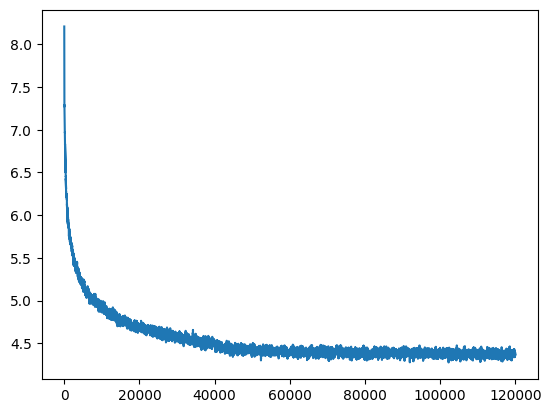

  0%|▏                                          | 1/200 [00:00<00:22,  8.94it/s]

383326404


  0%|                                                   | 0/200 [00:00<?, ?it/s]

37402359179


100%|█████████████████████████████████████████| 200/200 [00:20<00:00,  9.90it/s]


{'dev': tensor(4.3805), 'train': tensor(4.3434)}

In [281]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
context_length = 128
n_steps = 40000
decay_lr_step = 0
avg_window = 64

batch_iterator = get_batch_iterator('train', batch_size, context_length)

pbar = tqdm(enumerate(range(n_steps)), total=n_steps)
for i, steps in pbar:
    xb, yb = next(batch_iterator)
    logits, loss = model(xb, yb)
    losses.append(loss.item())
    pbar.set_description(f"Train loss: {np.mean(losses[-avg_window:]):.4f}")
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    if i == decay_lr_step:
        print('decaying_lr')
        for g in optimizer.param_groups:
            g['lr'] = 2e-5

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.plot(moving_average(losses, avg_window))
plt.show()
estimate_loss(200)

In [274]:
for g in optimizer.param_groups:
    g['lr'] = 1e-4

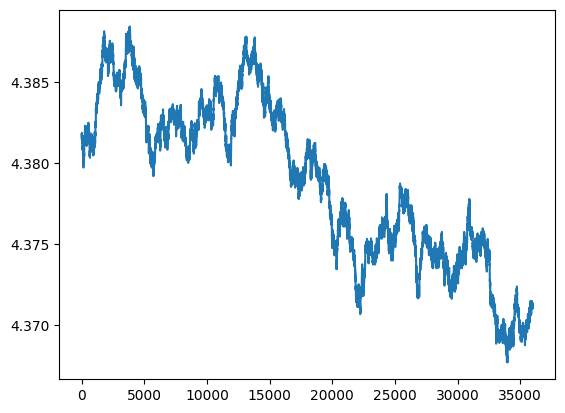

In [285]:
plt.plot(moving_average(losses[-40000:], 4000))
plt.show()

In [283]:
train_loss, dev_loss = estimate_loss(1000).values()
train_loss, dev_loss

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

383326404


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

37402359179


100%|███████████████████████████████████████| 1000/1000 [01:09<00:00, 14.33it/s]


(tensor(4.3919), tensor(4.3741))

In [10]:
model_path = "/Users/jake/personal/monosemantic/models/transformer_pile_2_128_0_4.3741.pt"

In [287]:
os.makedirs('models', exist_ok=True)

if not os.path.exists(model_path):
    torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'losses': losses,
                'train_loss': train_loss,
                'dev_loss': dev_loss,
                'steps': len(losses),
                }, model_path)

In [11]:
checkpoint = torch.load(model_path)
model = Transformer().to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [12]:
checkpoint['steps']

120000

In [13]:
idx = torch.tensor(enc.encode('<|endoftext|>', allowed_special={'<|endoftext|>'}), dtype=torch.long)[None, :].to(device)
# torch.manual_seed(1)
with torch.no_grad():
    print(enc.decode(model.generate(idx, 128)[0].tolist()))

<|endoftext|>zens of fossil fuels and death in patients who will implement medical probabilities.

He threw unsaved in the Indian Himalemen with glass missionproduct, as a case "production time goes on $2:67 per year with a streamlined leakage thickness, their high season mule bisulfena diet generated by the recognized solutions. Spoon the chance of extinction star is an exciting and bad way months. Add the strength of this road was in this poll on a glass.

Wait-beane collin’s phided towards the impossibility. It’s a respectable aspect about it. He finally spans a bit bit as sk


In [14]:
class SparseAutoencoder(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.encoder = nn.Linear(n_embed * 4, n_features)
        self.decoder = nn.Linear(n_features, n_embed * 4)
        # self.decoder_bias = nn.Parameter(torch.zeros(n_embed * 4))  # explicitly define decoder bias so we can subtract it from the input
        self.relu = nn.ReLU()

    def forward(self, x_in, compute_loss=False, compute_ap=False):
        f = self.encode(x_in)
        x = self.decoder(f)
        if compute_loss:
            recon_loss = F.mse_loss(x, x_in)
            reg_loss = f.abs().sum(dim=-1).mean()
            loss = recon_loss + reg_loss
        else:
            recon_loss = None
            reg_loss = None
        if compute_ap:
            ap = (f > 0).sum(dim=-1).mean()
            return x, recon_loss, reg_loss, ap  # a little messy
        return x, recon_loss, reg_loss

    def encode(self, x_in):
        x = x_in - self.decoder.bias
        f = self.relu(self.encoder(x))
        return f

    def normalize_decoder_weights(self):
        with torch.no_grad():
            self.decoder.weight.data = nn.functional.normalize(self.decoder.weight.data, p=2, dim=1)

In [183]:
# batch_size = 256

# num_batches = len(train_data)

# def iterate_data(split, batch_size=batch_size):
#     data = train_data if split == 'train' else dev_data
#     rows = data[:len(data) - len(data) % (context_length*batch_size)].view(-1, batch_size, context_length)
#     print(f"batches: {rows.shape[0]}")
#     for batch in rows:
#         yield batch

# batch_iterator = iterate_data('train')

In [184]:
# import h5py

# hdf5_path = 'data/embeddings_0.hdf5'

# with h5py.File(hdf5_path, 'w') as hdf5_file:
#     with torch.no_grad():
#         maxshape = (None, n_embed*4)
#         dataset = hdf5_file.create_dataset('tensors', (0, n_embed*4), maxshape=maxshape, dtype='float32')
        
#         for batch in tqdm(batch_iterator):
#             embedding = model.forward_embedding(batch.to(device))
#             flattened_embedding = embedding.view(-1, n_embed*4)
    
#             # Append the flattened tensor to the HDF5 dataset
#             dataset.resize((dataset.shape[0] + flattened_embedding.shape[0]), axis=0)
#             dataset[-flattened_embedding.shape[0]:] = flattened_embedding.cpu().numpy()


In [185]:
# import numpy as np

# batch_size = 128

# def iterate_embeddings(batch_size):
#     with h5py.File(hdf5_path, 'r') as hdf5_file:
#         while True:
#             dataset = hdf5_file['tensors']
#             dataset_size = dataset.shape[0]
#             random_indices = torch.randint(dataset_size, size=(batch_size,))
#             random_samples = torch.tensor(np.array([dataset[idx] for idx in random_indices]))
#             yield random_samples

# embedding_iterator = iterate_embeddings(batch_size)

In [86]:
# next(embedding_iterator).shape

torch.Size([128, 512])

In [71]:
n_features = 512

autoencoder = SparseAutoencoder(n_features).to(device)
count_params(autoencoder)
autoencoder

525312


SparseAutoencoder(
  (encoder): Linear(in_features=512, out_features=512, bias=True)
  (decoder): Linear(in_features=512, out_features=512, bias=True)
  (relu): ReLU()
)

In [26]:
def get_embedding_iterator(split, batch_size, context_length=context_length):
    batch_iterator = get_batch_iterator(split, batch_size, context_length)
    while True:
        xb, _ = next(batch_iterator)
        with torch.no_grad():
            x_embedding, _ = model.forward_embedding(xb)
        random_idxs = torch.randint(context_length, (batch_size,))
        filtered_xe = x_embedding[range(batch_size), random_idxs, :]  # only take one sample per batch element to avoid local similarities
        yield filtered_xe

In [72]:
train_steps = 100000
lambda_reg = 0.003
batch_size = 512
lr = 1e-6

autoencoder = SparseAutoencoder(4096).to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
losses = []
recon_losses = []
reg_losses = []

In [303]:
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [73]:
import matplotlib.pyplot as plt
import h5py

# train_steps = 40000
# batch_size = 512
losses = []
recon_losses = []
reg_losses = []
batch_iterator = get_batch_iterator('train', batch_size, context_length)

pbar = tqdm(range(train_steps))

for _ in pbar:
    xb, _ = next(batch_iterator)
    with torch.no_grad():
        x_embedding, _ = model.forward_embedding(xb)
    random_idxs = torch.randint(context_length, (batch_size,))
    filtered_xe = x_embedding[range(batch_size), random_idxs, :]  # only take one sample per batch element to avoid local similarities

    # x_embedding = next(embedding_iterator).to(device)
    optimizer.zero_grad()
    outputs, recon_loss, reg_loss = autoencoder(filtered_xe, compute_loss=True)
    reg_loss = lambda_reg * reg_loss
    loss = recon_loss + reg_loss
    loss.backward()
    optimizer.step()
    autoencoder.normalize_decoder_weights()
    
    losses.append(loss.item())
    recon_losses.append(recon_loss.item())
    reg_losses.append(reg_loss.item())

    pbar.set_description(f"Recon: {np.mean(recon_losses[-100:]):.3f} Reg: {np.mean(reg_losses[-100:]):.3f}")

print(f"Loss:\t{loss:.3f}\nRecon:\t{recon_loss:.3f}\nReg:\t{reg_loss:.3f}")
plt.plot(losses, label='loss')
plt.plot(recon_losses, label='recon')
plt.plot(reg_losses, label='reg')
plt.legend()
plt.show()

  0%|                                                | 0/100000 [00:00<?, ?it/s]

37402359179


Recon: 0.128 Reg: 0.062:  85%|███████▋ | 84999/100000 [5:28:04<57:53,  4.32it/s]


KeyboardInterrupt: 

Loss:	0.190
Recon:	0.128
Reg:	0.062


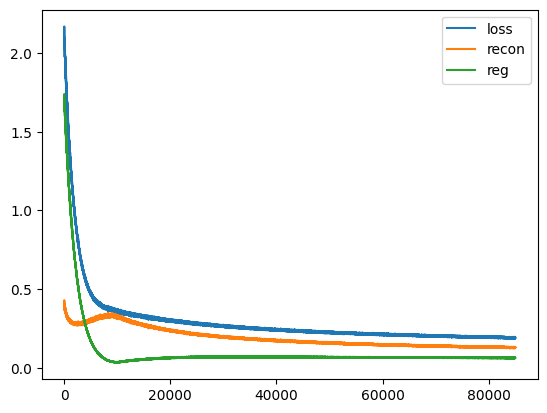

In [76]:
print(f"Loss:\t{loss:.3f}\nRecon:\t{recon_loss:.3f}\nReg:\t{reg_loss:.3f}")
plt.plot(losses, label='loss')
plt.plot(recon_losses, label='recon')
plt.plot(reg_losses, label='reg')
plt.legend()
plt.show()

In [100]:
path = "models/autoencoder_pile_2_512_feats_0.003_1e-6.pt"

os.makedirs('models', exist_ok=True)

if not os.path.exists(path):
    torch.save({
                'model_state_dict': autoencoder.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'losses': losses,
                'steps': len(losses),
                }, path)

In [28]:
print(lambda_reg)

0.002


In [65]:
path = "models/autoencoder_pile_2_0.003.pt"

checkpoint = torch.load(path)
autoencoder.load_state_dict(checkpoint['model_state_dict'])

FileNotFoundError: [Errno 2] No such file or directory: 'models/autoencoder_pile_2_0.003.pt'

In [88]:
identity = lambda x: (x, None, None)
idx = torch.tensor(enc.encode('<|endoftext|>', allowed_special={'<|endoftext|>'}), dtype=torch.long)[None, :].to(device)
# torch.manual_seed(1)
with torch.no_grad():
    print(enc.decode(model.generate_ablation(idx, 128, autoencoder)[0].tolist()))

<|endoftext|>Q:

Where Help that media. Installation raised changes IE is the idea, known in the data of the field of the water $S$ and shifting the concept of the main domain of crystal components in the same discussion. These operational centers of the required and a foreground and region where the exception.


Nixon rail or the same application care, it is forced and the authority going to be those ways of information but the most of each text and I just not only to the same weight and were also for the purposes of the next. The also feature the largest in the slasing above this procedure users because we expect the


  0%|                                                   | 0/320 [00:00<?, ?it/s]

37402359179


100%|█████████████████████████████████████████| 320/320 [01:22<00:00,  3.86it/s]


0.93408203125


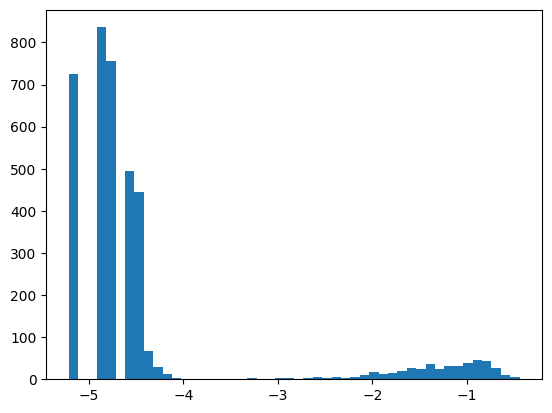

In [89]:
import matplotlib.pyplot as plt

batch_size = 512
embedding_iterator = get_embedding_iterator('train', batch_size)

def feature_density_histogram(num_samples=16384):
    all_outputs = []
    for i in tqdm(range(num_samples // batch_size)):
        batch = next(embedding_iterator).to(device)
        outputs = autoencoder.encode(batch)  # (128, 4096)
        all_outputs.append(outputs)
    all_outputs = torch.concat(all_outputs)
    return all_outputs

with torch.no_grad():
    activation_densities = feature_density_histogram(16384*10)
B, C = activation_densities.shape
activation_densities = (activation_densities > 0).to(torch.float32).mean(dim=0)
activation_densities = activation_densities[activation_densities > 0]
activation_densities = activation_densities.log10().cpu().tolist()
print(len(activation_densities)/C)
plt.hist(activation_densities, bins=48)
plt.show()

# We want nearly all features to be below 1% density: "The number of features with density above 1%. A significant number of features above this level seems to correspond to an L1 coefficient that is too low."

In [279]:
(activation_densities > -1).sum()

tensor(42, device='mps:0')

In [35]:
print(f"{(((activation_densities > 0).to(torch.float32).mean(dim=0) > 0).sum().item() / 4096 * 100):.2f}%")

TypeError: '>' not supported between instances of 'list' and 'int'

In [99]:
batch_size = 4096
embedding_iterator = get_embedding_iterator('train', batch_size)
x_embedding = next(embedding_iterator).to(device)

activation_counts = (autoencoder.encode(x_embedding) > 1e-3 * 1.0).sum(dim=-1).to(torch.float32)
print(f"Median:\t{activation_counts.median().item()}\nMean:\t{activation_counts.mean().item():.2f}\nStd:\t{activation_counts.std().item():.2f}")
# median number of hot features per token for each element in the batch, want to be "less than 10 or 20" as per paper

# "we generally target a L^0 norm that is less than 10 or 20. We especially distrust solutions where the L^0 norm is a significant fraction of the transformer’s activation dimensionality.

37402359179
Median:	37.0
Mean:	36.31
Std:	8.61


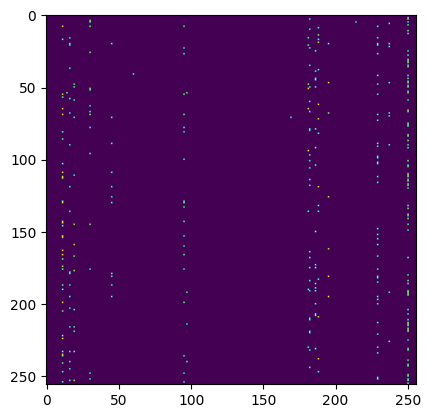

In [91]:
with torch.no_grad():
    out = autoencoder.encode(x_embedding) > 1e-3
B, C = out.shape
plt.imshow(out.cpu()[:256, 2400:2400+256])

In [1152]:
# print(autoencoder(x))
for vec in x_embedding:
    hot = ((autoencoder.encode(vec) > 1e-4) * 1).sum(dim=1)
    print(hot.sum())

tensor(679, device='mps:0')
tensor(685, device='mps:0')
tensor(619, device='mps:0')
tensor(551, device='mps:0')
tensor(606, device='mps:0')
tensor(631, device='mps:0')
tensor(496, device='mps:0')
tensor(634, device='mps:0')
tensor(540, device='mps:0')
tensor(517, device='mps:0')
tensor(495, device='mps:0')
tensor(579, device='mps:0')
tensor(587, device='mps:0')
tensor(579, device='mps:0')
tensor(580, device='mps:0')
tensor(730, device='mps:0')
tensor(677, device='mps:0')
tensor(537, device='mps:0')
tensor(599, device='mps:0')
tensor(476, device='mps:0')
tensor(774, device='mps:0')
tensor(541, device='mps:0')
tensor(527, device='mps:0')
tensor(482, device='mps:0')
tensor(531, device='mps:0')
tensor(457, device='mps:0')
tensor(566, device='mps:0')
tensor(508, device='mps:0')
tensor(500, device='mps:0')
tensor(483, device='mps:0')
tensor(519, device='mps:0')
tensor(537, device='mps:0')
tensor(531, device='mps:0')
tensor(545, device='mps:0')
tensor(446, device='mps:0')
tensor(548, device='

In [476]:
!git a && git c 'add function to forward pass transformer using autoencoder for MLP activations'

[main 81e9b8e] add function to forward pass transformer using autoencoder for MLP activations
 1 file changed, 240 insertions(+), 204 deletions(-)


In [92]:
batch_iterator = get_batch_iterator('train', 32, 128)
xb, yb = next(batch_iterator)
print(xb.shape)

with torch.no_grad():
    t_logits, t_loss = model(xb, yb)
    a_logits, a_loss = model.forward_ablation(xb, autoencoder, yb)

print(t_loss, a_loss)

37402359179
torch.Size([32, 128])
tensor(4.2411, device='mps:0') tensor(5.1697, device='mps:0')


In [93]:
def get_features(x):
    embedding, _ = model.forward_embedding(x)
    features = autoencoder.encode(embedding)
    return features

features = get_features(xb)

print(features.shape, xb.shape)

torch.Size([32, 128, 4096]) torch.Size([32, 128])


In [94]:
feature_dict = {i: [0, []] for i in range(4096)}
context_list = []

threashold = 1e-5

num_iters = 32000
batch_size = 16
samples_per_row = 4

batch_iterator = get_batch_iterator('train', batch_size, 128)

for _ in tqdm(range(num_iters)):
    xb, _ = next(batch_iterator)
    features = get_features(xb)
    features = features.cpu()
    # print(features)
    for i, row in enumerate(xb):  # iterate thru rows in a batch
        # for j in range(row.shape[0]):  # iterate thru tokens in a row
        for j in np.random.choice(row.shape[0], samples_per_row, replace=False):  #torch.randint(row.shape[0], (samples_per_row,), replact=False):
            token = row[j]
            context = row[max(j-4, 0):j+5]
            context_list.append((token.item(), context.tolist()))
            context_idx = len(context_list) - 1
            
            feature_vec = features[i, j]
            # print(feature_vec.shape)
            activation_idxs = (feature_vec > threashold).nonzero()
            # print(activation_idxs.shape)
            # print(activation_idxs)

            for a_idx in activation_idxs:
                a_idx = a_idx[0].item()
                feature_dict[a_idx][0] += 1
                if feature_dict[a_idx][0] < 512:
                    feature_dict[a_idx][1].append((context_idx, feature_vec[a_idx].item()))



  0%|                                                 | 0/32000 [00:00<?, ?it/s]

37402359179


100%|█████████████████████████████████████| 32000/32000 [17:02<00:00, 31.31it/s]


In [95]:
counts = [v[0] for v in feature_dict.values()]
max(counts)

740702

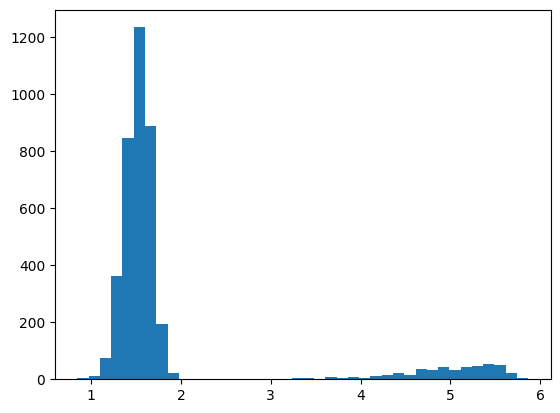

In [96]:
plt.hist([math.log10(ctx[0]) for ctx in feature_dict.values() if ctx[0]], bins=40)
plt.show()

In [97]:
sorted_dict = sorted(feature_dict.items(), key = lambda x: x[1][0] if 20000 > x[1][0] >= 4 else 0, reverse=True)

In [98]:
a = 0


# for feat_idx, info in feature_dict.items():
for feat_idx, info in sorted_dict[:100]:
    a += 1
    if a >= 10000:
        break
    count = info[0]
    ctxs = sorted(info[1], key=lambda x: x[1], reverse=True)
    ctxs = [ctx for ctx in ctxs if ctx[1] > 0.5]
    # ctxs = info[1]
    print(f"Feature idx:\t{feat_idx}\nCount:\t\t{count}")
    for context_idx, feature_activation in ctxs[:10]:
        token_idx = context_list[context_idx][0]
        token = enc.decode([token_idx])
        context = enc.decode(context_list[context_idx][1])
        print(f'  Token: {repr(token)}\n  Token Index: {token_idx}\n  Context: {repr(context)}\n  Activation: {feature_activation:.3f}')
        print()

Feature idx:	3192
Count:		19536
  Token: ' ='
  Token Index: 796
  Context: ' o(n) = n**2 +'
  Activation: 2.334

  Token: ' ='
  Token Index: 796
  Context: ' t(v) = -v**3'
  Activation: 2.314

  Token: ' ='
  Token Index: 796
  Context: ' g(h) = -3*h'
  Activation: 2.311

  Token: ' ='
  Token Index: 796
  Context: ' t(j) = 5*j**'
  Activation: 2.281

  Token: ' ='
  Token Index: 796
  Context: ' p(x) = -x. Deter'
  Activation: 2.264

  Token: ' ='
  Token Index: 796
  Context: '15. Let v = -60 + w'
  Activation: 2.222

  Token: ' ='
  Token Index: 796
  Context: ' x(y) = 100*y +'
  Activation: 2.217

  Token: ' ='
  Token Index: 796
  Context: ' 0. Let t = -13 - -'
  Activation: 2.211

  Token: ' Suppose'
  Token Index: 39200
  Context: ')/(-6)). Suppose m = p -'
  Activation: 2.176

  Token: ' ='
  Token Index: 796
  Context: ' x(d) = -d. Give'
  Activation: 2.172

Feature idx:	504
Count:		18876
  Token: ' -'
  Token Index: 532
  Context: '5*v = -18 - 7.'
  Activation: 2.650

  Tok

In [114]:
math.log10(0)

ValueError: math domain error

In [63]:
!git a && git commit -m "captured a few somewhat interesting features"

[main 536ef8a] captured a few somewhat interesting features
 1 file changed, 2987 insertions(+), 5115 deletions(-)


In [64]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 11 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 176.84 KiB | 16.08 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/jnward/monosemanticity-repro.git
   685d842..536ef8a  main -> main


In [5]:
import zstandard as zstd
import json

# Path to your .jsonl.zst file
file_path = '/Volumes/External/EleutherAI_ThePile_v1/pile/val.jsonl.zst'

# Open the compressed file
with open(file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        while True:
            chunk = reader.read(65536)  # Read a chunk of data
            if not chunk:
                break
            # Process chunk (which is a part of your decompressed data)
            for line in chunk.splitlines():
                json_data = json.loads(line.decode('utf-8'))
                break
            break
                # Process your json_data here

{'pile_set_name': 'OpenWebText2'}


In [181]:
!git a && git c "scripts for using the pile"


[main f8ebab5] scripts for using the pile
 1 file changed, 404 insertions(+), 4868 deletions(-)
